In [1]:
import numpy as np
import pandas as pd
from category_encoders.target_encoder import TargetEncoder
from sklearn.impute import SimpleImputer
import xgboost as xgb
from sklearn.model_selection import train_test_split
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.exceptions import NotFittedError
sns.set(style="white", color_codes=True)

In [2]:
train = pd.read_csv(r"/kaggle/input/playground-series-s4e8/train.csv", index_col = 'id')
test = pd.read_csv(r"/kaggle/input/playground-series-s4e8/test.csv", index_col = 'id')
sample_submission = pd.read_csv(r"/kaggle/input/playground-series-s4e8/sample_submission.csv", index_col = 'id')

print("train data :", train.shape)
print("test data :", test.shape)
print("sample_submission_data :", sample_submission.shape)

train data : (3116945, 21)
test data : (2077964, 20)
sample_submission_data : (2077964, 1)


In [3]:
sample_submission.head(5)

,class
id,
3116945,e
3116946,e
3116947,e
3116948,e
3116949,e


In [4]:
train.info()

train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3116945 entries, 0 to 3116944
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   class                 object 
 1   cap-diameter          float64
 2   cap-shape             object 
 3   cap-surface           object 
 4   cap-color             object 
 5   does-bruise-or-bleed  object 
 6   gill-attachment       object 
 7   gill-spacing          object 
 8   gill-color            object 
 9   stem-height           float64
 10  stem-width            float64
 11  stem-root             object 
 12  stem-surface          object 
 13  stem-color            object 
 14  veil-type             object 
 15  veil-color            object 
 16  has-ring              object 
 17  ring-type             object 
 18  spore-print-color     object 
 19  habitat               object 
 20  season                object 
dtypes: float64(3), object(18)
memory usage: 523.2+ MB


,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
id,,,,,,,,,,,,,,,,,,,,,
0,e,8.80,f,s,u,f,a,c,w,4.51,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,p,4.51,x,h,o,f,a,c,n,4.79,...,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,e,6.94,f,s,b,f,x,c,w,6.85,...,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,e,3.88,f,y,g,f,s,NaN,g,4.16,...,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,e,5.85,x,l,w,f,d,NaN,w,3.37,...,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [5]:
test.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
id,,,,,,,,,,,,,,,,,,,,
3116945,8.64,x,NaN,n,t,NaN,NaN,w,11.13,17.12,b,NaN,w,u,w,t,g,NaN,d,a
3116946,6.90,o,t,o,f,NaN,c,y,1.27,10.75,NaN,NaN,n,NaN,NaN,f,f,NaN,d,a
3116947,2.00,b,g,n,f,NaN,c,n,6.18,3.14,NaN,NaN,n,NaN,NaN,f,f,NaN,d,s
3116948,3.47,x,t,n,f,s,c,n,4.98,8.51,NaN,NaN,w,NaN,n,t,z,NaN,d,u
3116949,6.17,x,h,y,f,p,NaN,y,6.73,13.70,NaN,NaN,y,NaN,y,t,NaN,NaN,d,u


In [6]:
def null_percent(df):
    per=((df.isnull().sum()/len(df))*100).round(2)
    return per
print("Nan Values in Train data")
print(null_percent(train))
print("Nan Values in Test data")
print(null_percent(test))

Nan Values in Train data
class                    0.00
cap-diameter             0.00
cap-shape                0.00
cap-surface             21.53
cap-color                0.00
does-bruise-or-bleed     0.00
gill-attachment         16.81
gill-spacing            40.37
gill-color               0.00
stem-height              0.00
stem-width               0.00
stem-root               88.45
stem-surface            63.55
stem-color               0.00
veil-type               94.88
veil-color              87.94
has-ring                 0.00
ring-type                4.13
spore-print-color       91.43
habitat                  0.00
season                   0.00
dtype: float64
Nan Values in Test data
cap-diameter             0.00
cap-shape                0.00
cap-surface             21.51
cap-color                0.00
does-bruise-or-bleed     0.00
gill-attachment         16.83
gill-spacing            40.40
gill-color               0.00
stem-height              0.00
stem-width               0.00
stem-r

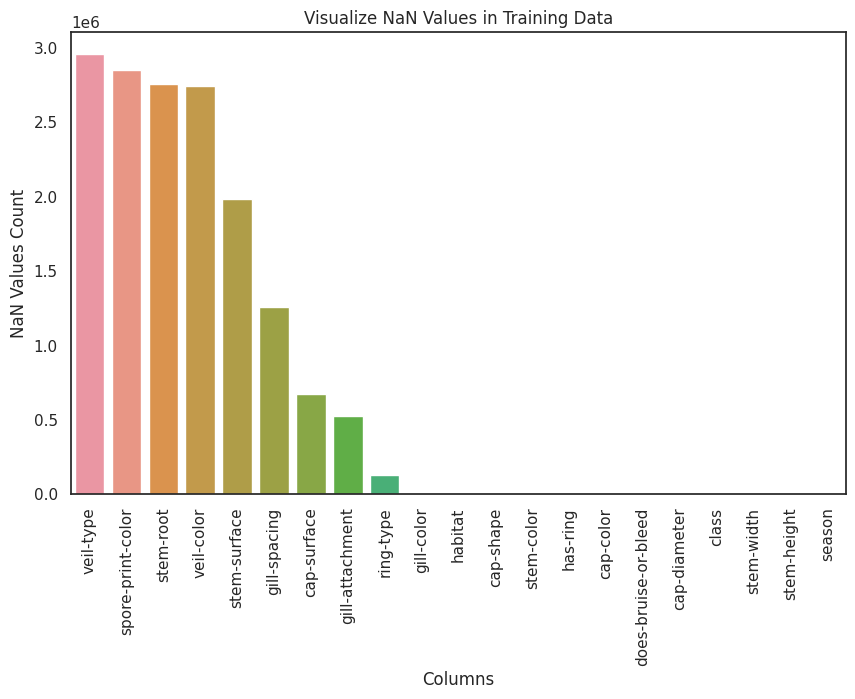

In [7]:
train_null_sum = train.isnull().sum()
train_null_sum = train_null_sum.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=train_null_sum.index, y=train_null_sum.values)

plt.title('Visualize NaN Values in Training Data')
plt.xlabel('Columns')
plt.ylabel('NaN Values Count')
plt.xticks(rotation=90)

plt.show()

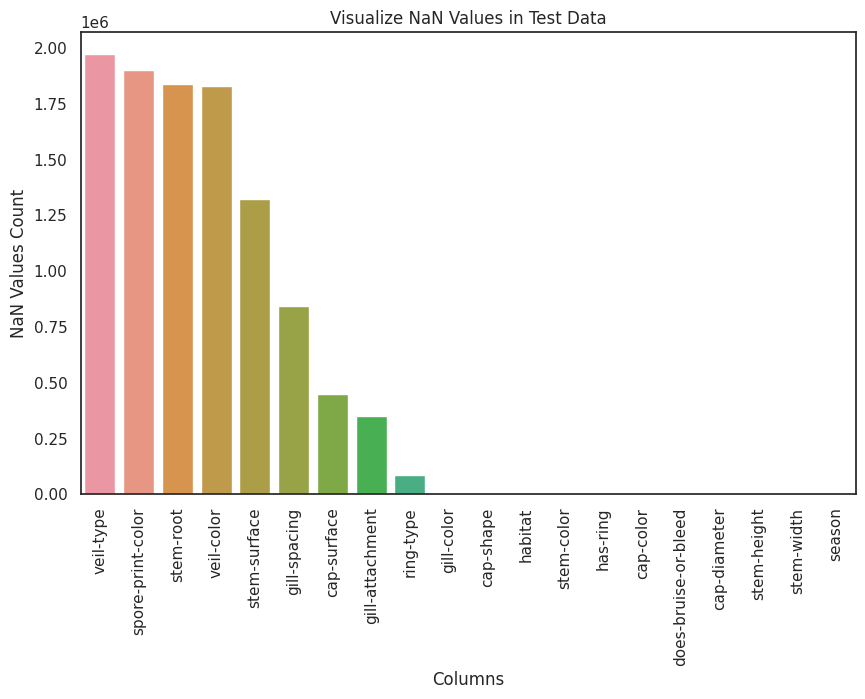

In [8]:
test_null_sum = test.isnull().sum()
test_null_sum = test_null_sum.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=test_null_sum.index, y=test_null_sum.values)

plt.title('Visualize NaN Values in Test Data')
plt.xlabel('Columns')
plt.ylabel('NaN Values Count')
plt.xticks(rotation=90)

plt.show()

In [9]:
train_duplicate=train.duplicated().sum()
test_duplicate=test.duplicated().sum()

print("Total duplicates in training data ",train_duplicate)
print("Total duplicates in testing data: ",test_duplicate)

Total duplicates in training data  0
Total duplicates in testing data:  0


In [10]:
train['class'] = train['class'] =='p'

encoder  = TargetEncoder()
cat_features = [val for val in train.drop(columns = 'class').select_dtypes(exclude ='number').columns]
for feature in cat_features:
    train[feature] = encoder.fit_transform(train[feature], train['class'])
    test[feature] = encoder.transform(test[feature])

In [11]:
def find_outliers_iqr(data):
    outliers = pd.DataFrame()

    for column in data.select_dtypes(include=[float, int]).columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

   
        outliers[column] = ((data[column] < lower_bound) | (data[column] > upper_bound))

    return outliers

outliers = find_outliers_iqr(test)  # Replace 'test' with your DataFrame
print(outliers)

         cap-diameter  cap-shape  cap-surface  cap-color  \
id                                                         
3116945         False      False        False      False   
3116946         False       True        False      False   
3116947         False       True        False      False   
3116948         False      False        False      False   
3116949         False      False        False      False   
...               ...        ...          ...        ...   
5194904         False      False        False      False   
5194905         False      False        False      False   
5194906         False      False        False      False   
5194907         False       True        False      False   
5194908         False      False        False      False   

         does-bruise-or-bleed  gill-attachment  gill-spacing  gill-color  \
id                                                                         
3116945                  True            False         False       

In [12]:
def find_outliers_zscore(data, threshold=30):
    outliers = pd.DataFrame()

    for column in data.select_dtypes(include=[float, int]).columns:
        z_scores = np.abs(stats.zscore(data[column].dropna()))
        outliers[column] = z_scores > threshold

    return outliers

# Example usage
outliers = find_outliers_zscore(test)  # Replace 'test' with your DataFrame
print(outliers)

         cap-diameter  cap-shape  cap-surface  cap-color  \
id                                                         
3116945         False      False        False      False   
3116946         False      False        False      False   
3116947         False      False        False      False   
3116948         False      False        False      False   
3116949         False      False        False      False   
...               ...        ...          ...        ...   
5194904         False      False        False      False   
5194905         False      False        False      False   
5194906         False      False        False      False   
5194907         False      False        False      False   
5194908         False      False        False      False   

         does-bruise-or-bleed  gill-attachment  gill-spacing  gill-color  \
id                                                                         
3116945                 False            False         False       

<Axes: xlabel='stem-height', ylabel='stem-width'>

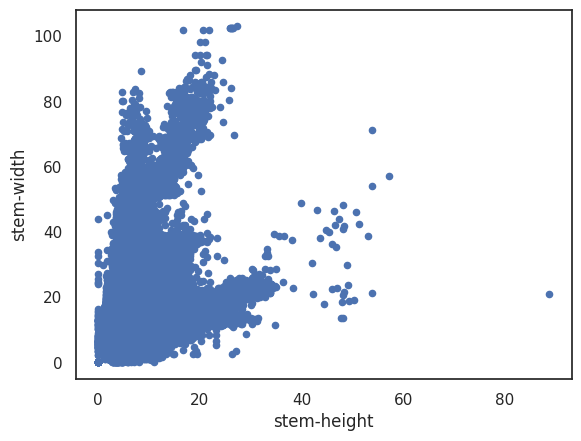

In [13]:
train.plot(kind="scatter", x="stem-height", y="stem-width")

<Axes: xlabel='stem-height', ylabel='stem-width'>

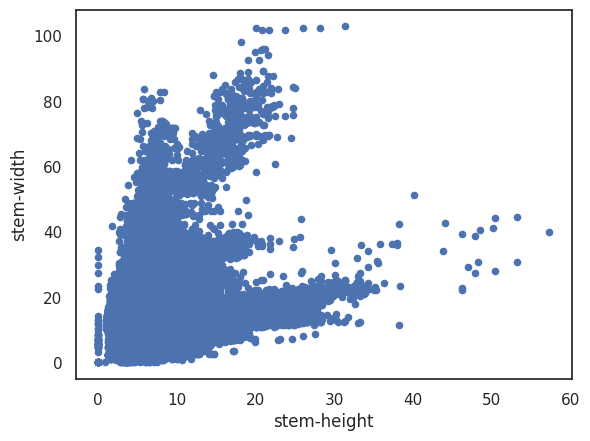

In [14]:
test.plot(kind="scatter", x="stem-height", y="stem-width")

<Axes: xlabel='cap-diameter', ylabel='stem-width'>

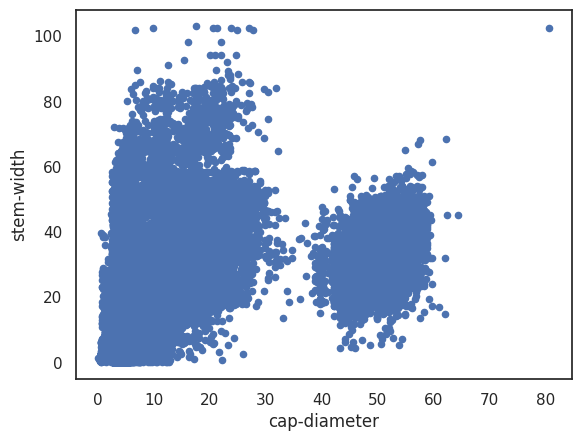

In [15]:
train.plot(kind="scatter", x="cap-diameter", y="stem-width")

<Axes: xlabel='cap-diameter', ylabel='stem-width'>

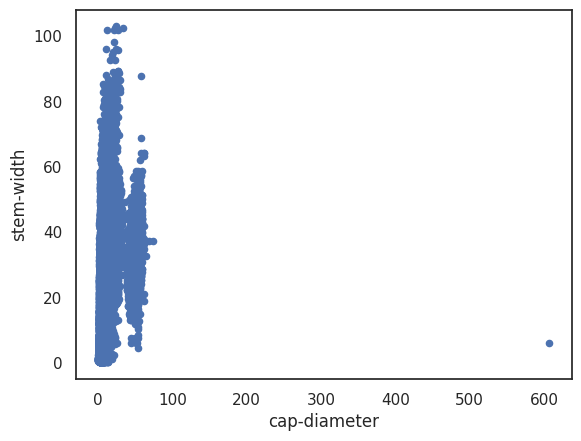

In [16]:
test.plot(kind="scatter", x="cap-diameter", y="stem-width")

<Axes: xlabel='stem-height', ylabel='cap-diameter'>

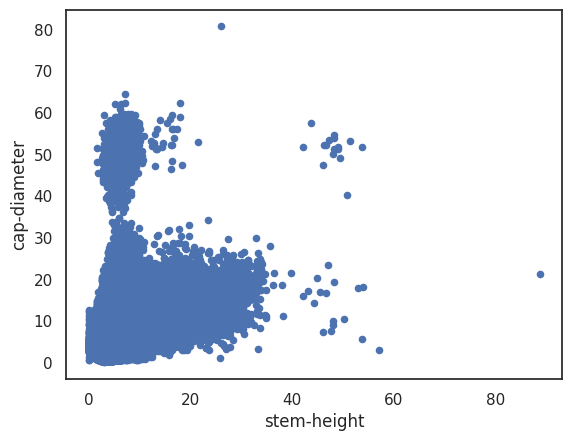

In [17]:
train.plot(kind="scatter", x="stem-height", y="cap-diameter")

<Axes: xlabel='stem-height', ylabel='cap-diameter'>

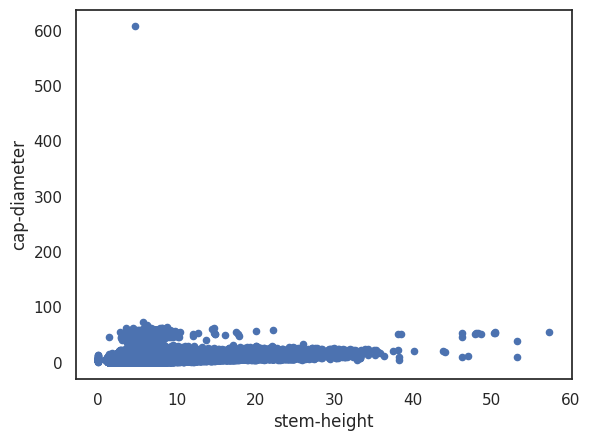

In [18]:
test.plot(kind="scatter", x="stem-height", y="cap-diameter")

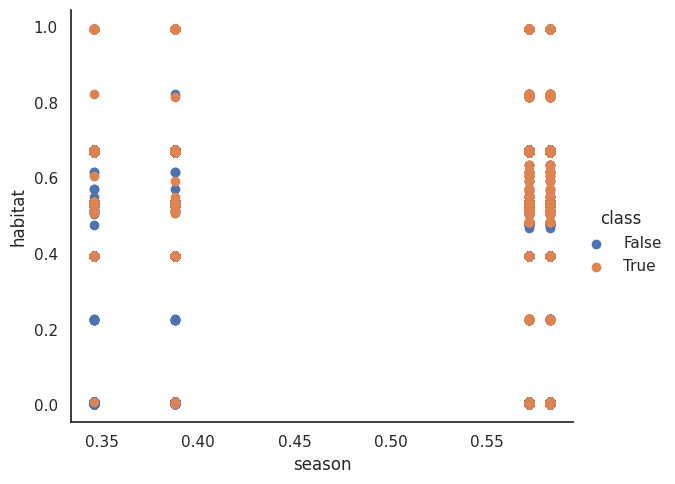

In [19]:
g = sns.FacetGrid(train, hue="class", height=5, aspect=1.2)
g.map(plt.scatter, "season", "habitat")
g.add_legend()

plt.show()

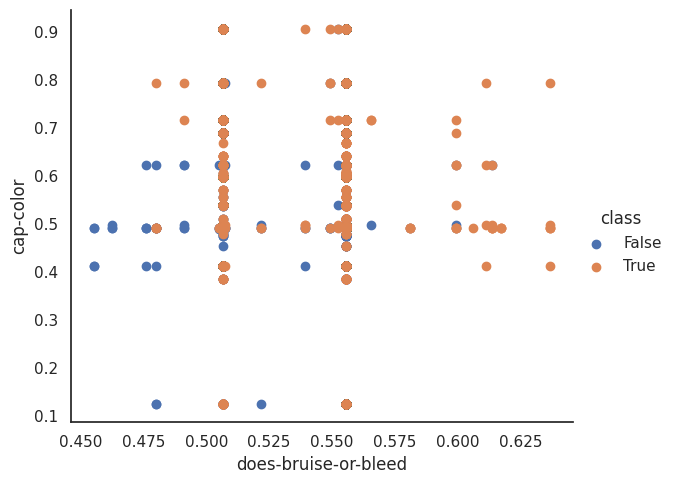

In [20]:
g = sns.FacetGrid(train, hue="class", height=5, aspect=1.2)
g.map(plt.scatter, "does-bruise-or-bleed", "cap-color")
g.add_legend()

plt.show()
# Here True = Poisonious, False = Edible

In [21]:
X = train.drop(['class'], axis=1)
y = train['class']

In [22]:
from sklearn.exceptions import NotFittedError

try:
    # Train/Test split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.05, random_state=5)

    # Initialize the classifier
    clf = xgb.XGBClassifier(
        max_depth=8,
        min_child_weight=1,
        gamma=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        reg_alpha=0.1,
        reg_lambda=1,
        learning_rate=0.1,
        n_estimators=2000,
        random_state=5,
        tree_method="hist",  # Switch from gpu_hist to hist
        device="cpu",        # Force to use CPU since no GPU was detected
        eval_metric="logloss",
        early_stopping_rounds=10,
        verbosity=1
    )

    # Fit the classifier
    clf.fit(
        X_train, y_train, 
        eval_set=[(X_val, y_val)], 
        verbose=True
    )

    # Predict on test data
    preds = clf.predict(test)
    
    # Prepare submission
    sample_submission['class'] = preds
    sample_submission['class'] = sample_submission['class'].replace({1: 'p', 0: 'e'})
    sample_submission.to_csv('submission.csv')

except NotFittedError as e:
    print(f"Model not fitted: {e}")
except ValueError as e:
    print(f"Value error: {e}")


[0]	validation_0-logloss:0.62129
[1]	validation_0-logloss:0.56361
[2]	validation_0-logloss:0.51621
[3]	validation_0-logloss:0.47520
[4]	validation_0-logloss:0.43949
[5]	validation_0-logloss:0.40625
[6]	validation_0-logloss:0.37394
[7]	validation_0-logloss:0.34939
[8]	validation_0-logloss:0.32611
[9]	validation_0-logloss:0.30434
[10]	validation_0-logloss:0.28547
[11]	validation_0-logloss:0.26977
[12]	validation_0-logloss:0.25704
[13]	validation_0-logloss:0.24412
[14]	validation_0-logloss:0.23133
[15]	validation_0-logloss:0.21775
[16]	validation_0-logloss:0.20908
[17]	validation_0-logloss:0.19891
[18]	validation_0-logloss:0.18827
[19]	validation_0-logloss:0.17905
[20]	validation_0-logloss:0.16973
[21]	validation_0-logloss:0.16114
[22]	validation_0-logloss:0.15375
[23]	validation_0-logloss:0.14743
[24]	validation_0-logloss:0.14322
[25]	validation_0-logloss:0.13952
[26]	validation_0-logloss:0.13373
[27]	validation_0-logloss:0.12902
[28]	validation_0-logloss:0.12451
[29]	validation_0-loglos

In [23]:
sample_submission.head(5)

,class
id,
3116945,e
3116946,p
3116947,p
3116948,p
3116949,e
